哈摟，各位資料科學家大家好，我是來自於台北市"頭期款不足"的阿宏，我想買房子很久了，但是不知道要買哪個地方，想先從內政部不動產交易時價登入資料中先了解行情，我現在手邊蒐集了台北市Taipei(A_lvr_land_A.csv)、新北市New_Taipei(F_lvr_land_A.csv)、台中市Taichung(B_lvr_land_A.csv)、高雄市Kaohsiung(E_lvr_land_A.csv)共四份資料，請各位資料科學家幫幫忙分析了。

# 1.不動產資料檔案讀取並串接

資料分散在4個資料，先合併成一個資料方便後續分析，但是我發現有英文欄位跟中文欄位，留下中文刪除英文，並加入新的欄位用以分辨台北市Taipei、新北市New_Taipei、台中市Taichung、高雄市Kaohsiung

1. 利用 Pandas 中的 pd.read_csv() 分別讀取 A_lvr_land_A.csv、B_lvr_land_A.csv、E_lvr_land_A.csv、F_lvr_land_A.csv。
2. 刪除csv中第二列英文翻譯，The villages and towns urban district,transaction sign,land sector position building sector house number plate,land shifting total area square meter,....。
3. 生成 city 欄位，其中以地區分類台北市Taipei(A_lvr_land_A.csv)、新北市New_Taipei(F_lvr_land_A.csv)、台中市Taichung(B_lvr_land_A.csv)、高雄市Kaohsiung(E_lvr_land_A.csv)。
4. 將以上四份資料運用 pd.concat() 串接。

In [1]:
import numpy as np 
import pandas as pd 
import seaborn  as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# 1.利用 Pandas中的 pd.read_csv()分別讀取 A_lvr_land_A.csv、B_lvr_land_A.csv、E_lvr_land_A.csv、F_lvr_land_A.csv。

df_taipei = pd.read_csv( 'A_lvr_land_A.csv', dtype='unicode' )
df_new_taipei = pd.read_csv( 'F_lvr_land_A.csv', dtype='unicode' )
df_taichung = pd.read_csv( 'B_lvr_land_A.csv', dtype='unicode' )
df_kaohsiung = pd.read_csv( 'E_lvr_land_A.csv', dtype='unicode' )

for city, data in zip(['台北市','新北市','台中市','高雄市'],[df_taipei,df_new_taipei,df_taichung,df_kaohsiung]):
    print( city )
    print( data.info(), '\n' )

台北市
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8842 entries, 0 to 8841
Data columns (total 32 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   鄉鎮市區           8842 non-null   object
 1   交易標的           8842 non-null   object
 2   土地區段位置建物區段門牌   8842 non-null   object
 3   土地移轉總面積平方公尺    8842 non-null   object
 4   都市土地使用分區       8751 non-null   object
 5   非都市土地使用分區      1 non-null      object
 6   非都市土地使用編定      1 non-null      object
 7   交易年月日          8842 non-null   object
 8   交易筆棟數          8842 non-null   object
 9   移轉層次           7765 non-null   object
 10  總樓層數           7756 non-null   object
 11  建物型態           8842 non-null   object
 12  主要用途           7589 non-null   object
 13  主要建材           7764 non-null   object
 14  建築完成年月         7322 non-null   object
 15  建物移轉總面積平方公尺    8842 non-null   object
 16  建物現況格局-房       8842 non-null   object
 17  建物現況格局-廳       8842 non-null   object
 18  建物現況格局-衛       8842 non-

In [3]:
df_taipei.head(3)

,鄉鎮市區,交易標的,土地區段位置建物區段門牌,土地移轉總面積平方公尺,都市土地使用分區,非都市土地使用分區,非都市土地使用編定,交易年月日,交易筆棟數,移轉層次,...,單價元平方公尺,車位類別,車位移轉總面積(平方公尺),車位總價元,備註,編號,主建物面積,附屬建物面積,陽台面積,電梯
0,The villages and towns urban district,transaction sign,land sector position building sector house num...,land shifting total area square meter,the use zoning or compiles and checks,the non-metropolis land use district,non-metropolis land use,transaction year month and day,transaction pen number,shifting level,...,the unit price (NTD / square meter),the berth category,berth shifting total area square meter,the berth total price NTD,the note,serial number,NaN,NaN,NaN,NaN
1,文山區,房地(土地+建物)+車位,臺北市文山區忠順街二段85巷1~30號,26.97,住,NaN,NaN,1090406,土地1建物1車位2,四層,...,156583,坡道平面,40.7,0,含增建或未登記建物。;內含獨立產權車位，未包含在棟數內。,RPVOMLMKNHPFFAA18CA,110.91,9.63,11.09,NaN
2,文山區,房地(土地+建物),臺北市文山區福興路91~120號,10.32,住,NaN,NaN,1090317,土地1建物1車位0,三層,...,149558,NaN,0.0,0,含增建或未登記建物。;,RPPPMLMKNHPFFAA67CA,24.58,1.28,2.3,NaN


In [4]:
# 2.刪除 csv中第二列英文翻譯

for data in [df_taipei,df_new_taipei,df_taichung,df_kaohsiung]:
    data.drop( index=0, inplace=True)

In [5]:
df_taipei.head(3)

,鄉鎮市區,交易標的,土地區段位置建物區段門牌,土地移轉總面積平方公尺,都市土地使用分區,非都市土地使用分區,非都市土地使用編定,交易年月日,交易筆棟數,移轉層次,...,單價元平方公尺,車位類別,車位移轉總面積(平方公尺),車位總價元,備註,編號,主建物面積,附屬建物面積,陽台面積,電梯
1,文山區,房地(土地+建物)+車位,臺北市文山區忠順街二段85巷1~30號,26.97,住,NaN,NaN,1090406,土地1建物1車位2,四層,...,156583,坡道平面,40.7,0,含增建或未登記建物。;內含獨立產權車位，未包含在棟數內。,RPVOMLMKNHPFFAA18CA,110.91,9.63,11.09,NaN
2,文山區,房地(土地+建物),臺北市文山區福興路91~120號,10.32,住,NaN,NaN,1090317,土地1建物1車位0,三層,...,149558,NaN,0.0,0,含增建或未登記建物。;,RPPPMLMKNHPFFAA67CA,24.58,1.28,2.3,NaN
3,文山區,房地(土地+建物),臺北市文山區木柵路四段121~150號,39.64,其他,NaN,NaN,1090418,土地2建物1車位0,六層,...,181472,NaN,0.0,0,NaN,RPSPMLMKNHPFFAA97CA,78.8,4.15,8.76,NaN


In [6]:
# 3.生成 city 欄位，其中以地區分類台北市 Taipei(A_lvr_land_A.csv)、新北市 New_Taipei(F_lvr_land_A.csv)、台中市 Taichung(B_lvr_land_A.csv)、高雄市 Kaohsiung(E_lvr_land_A.csv)。

for city_name, data in zip(['Taipei','New Taipei','Taichung','Kaohsiung'],[df_taipei,df_new_taipei,df_taichung,df_kaohsiung]):
    data['城市'] = city_name
    print( data.head(3), '\n' )

  鄉鎮市區          交易標的         土地區段位置建物區段門牌 土地移轉總面積平方公尺 都市土地使用分區 非都市土地使用分區  \
1  文山區  房地(土地+建物)+車位  臺北市文山區忠順街二段85巷1~30號       26.97        住       NaN   
2  文山區     房地(土地+建物)     臺北市文山區福興路91~120號       10.32        住       NaN   
3  文山區     房地(土地+建物)  臺北市文山區木柵路四段121~150號       39.64       其他       NaN   

  非都市土地使用編定    交易年月日      交易筆棟數 移轉層次  ...  車位類別 車位移轉總面積(平方公尺) 車位總價元  \
1       NaN  1090406  土地1建物1車位2   四層  ...  坡道平面          40.7     0   
2       NaN  1090317  土地1建物1車位0   三層  ...   NaN           0.0     0   
3       NaN  1090418  土地2建物1車位0   六層  ...   NaN           0.0     0   

                             備註                   編號   主建物面積 附屬建物面積   陽台面積  \
1  含增建或未登記建物。;內含獨立產權車位，未包含在棟數內。  RPVOMLMKNHPFFAA18CA  110.91   9.63  11.09   
2                   含增建或未登記建物。;  RPPPMLMKNHPFFAA67CA   24.58   1.28    2.3   
3                           NaN  RPSPMLMKNHPFFAA97CA    78.8   4.15   8.76   

    電梯      城市  
1  NaN  Taipei  
2  NaN  Taipei  
3  NaN  Taipei  

[3 rows x 33 columns] 

  鄉鎮

In [7]:
print( 'Shape of Data' )
print( '台北市:', df_taipei.shape )
print( '新北市:', df_new_taipei.shape )
print( '台中市:', df_taichung.shape )
print( '高雄市:', df_kaohsiung.shape )

Shape of Data
台北市: (8841, 33)
新北市: (19818, 33)
台中市: (16684, 33)
高雄市: (14133, 33)


In [8]:
# 4.將以上四份資料運用 pd.concat()串接

df = pd.concat( [df_taipei,df_new_taipei,df_taichung,df_kaohsiung], axis=0 )
df

,鄉鎮市區,交易標的,土地區段位置建物區段門牌,土地移轉總面積平方公尺,都市土地使用分區,非都市土地使用分區,非都市土地使用編定,交易年月日,交易筆棟數,移轉層次,...,車位類別,車位移轉總面積(平方公尺),車位總價元,備註,編號,主建物面積,附屬建物面積,陽台面積,電梯,城市
1,文山區,房地(土地+建物)+車位,臺北市文山區忠順街二段85巷1~30號,26.97,住,NaN,NaN,1090406,土地1建物1車位2,四層,...,坡道平面,40.7,0,含增建或未登記建物。;內含獨立產權車位，未包含在棟數內。,RPVOMLMKNHPFFAA18CA,110.91,9.63,11.09,NaN,Taipei
2,文山區,房地(土地+建物),臺北市文山區福興路91~120號,10.32,住,NaN,NaN,1090317,土地1建物1車位0,三層,...,NaN,0.0,0,含增建或未登記建物。;,RPPPMLMKNHPFFAA67CA,24.58,1.28,2.3,NaN,Taipei
3,文山區,房地(土地+建物),臺北市文山區木柵路四段121~150號,39.64,其他,NaN,NaN,1090418,土地2建物1車位0,六層,...,NaN,0.0,0,NaN,RPSPMLMKNHPFFAA97CA,78.8,4.15,8.76,NaN,Taipei
4,中正區,房地(土地+建物),臺北市中正區和平西路一段31~60號,4.26,商,NaN,NaN,1090413,土地2建物1車位0,九層,...,NaN,0.0,0,含增建或未登記建物。;,RPPOMLMKNHPFFAA57CA,18.34,0.0,6.45,NaN,Taipei
5,文山區,房地(土地+建物),臺北市文山區樟新街56巷1~30號,44.57,住,NaN,NaN,1090328,土地3建物1車位0,四層,...,NaN,0.0,0,含增建或未登記建物。;,RPWNMLNKNHPFFAA28CA,98.74,2.26,11.84,NaN,Taipei
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14129,三民區,房地(土地+建物),建興路380巷1弄1~30號,32.0,其他,NaN,NaN,1090727,土地1建物1車位0,四層,...,NaN,0.0,0,NaN,RPSPMLLLQHPFFDE09DA,101.29,0.0,7.12,NaN,Kaohsiung
14130,三民區,房地(土地+建物)+車位,民族巷1~30號,7.01,其他,NaN,NaN,1090816,土地1建物1車位1,十三層,...,坡道平面,6.25,800000,NaN,RPPQMLKLQHPFFDE78DA,51.16,9.73,0.0,NaN,Kaohsiung
14131,三民區,房地(土地+建物)+車位,大豐一路331~360號,27.23,其他,NaN,NaN,1090722,土地1建物1車位1,三層,...,坡道機械,0.0,0,NaN,RPSOMLSKQHPFFDE96DA,101.03,6.24,0.0,NaN,Kaohsiung
14132,三民區,房地(土地+建物)+車位,民族巷31~60號,10.32,其他,NaN,NaN,1090731,土地1建物1車位1,十層,...,坡道機械,26.06,0,NaN,RPWNMLLKQHPFFDE56DA,80.0,7.89,0.0,NaN,Kaohsiung


# 2. 資料清理與切片

因為我是想買來住的房子，所以幫忙刪除住宿用途以外的資料，並且限制
1. 交易年月日，限制在109年
2. 建物現況格局-房，1~5間 
3. 建物現況格局-廳，1~2廳

以下 columns_mapping、analysis_columns、columns_type 提供給資料科學家配合使用
1. 利用 .rename() 並配合以下 columns_mapping，將原中文欄位名稱改為英文方便之後分析。
2. 取出主要用途(main_use)為'住家用'以及都市土地使用分區(use_zoning)為'住'的資料並針對以下欄位analysis_columns做分析並去除 NaN 值。
   (提示:先取完之後再.dropna())
3. 觀察欄位資料型態，並利用 .astype() 搭配以下提供的 columns_type 做欄位型態轉換。
4. 做資料切片將<br>
    新增欄位交易年月日(tx_dt_year)，從交易年月日(tx_dt)萃取出年份<br>
    1.交易年月日(tx_dt_year)，限制在109年<br>
    2.建物現況格局-房(room_number)，限制在1到5間<br>
    3.建物現況格局-廳(hall_number)，限制在1到2廳<br>
    4.最後運用.reset_index()重新定義索引

In [9]:
columns_mapping = { '城市':'city', '鄉鎮市區':'towns', '交易標的':'transaction_sign',
                    '土地區段位置建物區段門牌':'house_number', '土地移轉總面積平方公尺':'land_area_square_meter', 
                    '都市土地使用分區':'use_zoning', '非都市土地使用分區':'land_use_district', 
                    '非都市土地使用編定':'land_use', '交易年月日':'tx_dt', 
                    '交易筆棟數':'transaction_pen_number', '移轉層次':'shifting_level', 
                    '總樓層數':'total_floor_number', '建物型態':'building_state', 
                    '主要用途':'main_use', '主要建材':'main_materials',
                    '建築完成年月':'complete_date', '建物移轉總面積平方公尺':'building_area_square_meter', 
                    '建物現況格局-房':'room_number', '建物現況格局-廳':'hall_number', 
                    '建物現況格局-衛':'health_number', '建物現況格局-隔間':'compartmented_number', 
                    '有無管理組織':'manages', '總價元':'total_price', 
                    '單價元平方公尺':'unit_price', '車位類別':'berth_category', 
                    '車位移轉總面積(平方公尺)':'berth_area_square_meter', '車位總價元':'berth_price', 
                    '備註':'note', '編號':'serial_number', 
                    '主建物面積':'main_building_area', '附屬建物面積':'auxiliary_building_area', 
                    '陽台面積':'balcony_area', '電梯':'elevator' }

analysis_columns = [ 'city', 'towns', 'main_use', 'use_zoning', 'total_price', 'building_area_square_meter',
                     'main_building_area', 'tx_dt', 'unit_price', 'room_number', 'hall_number', 'health_number' ]

columns_type = { 'total_price':'int', 'unit_price':'float', 'building_area_square_meter':'float', 
                 'main_building_area':'float', 'room_number':'int', 'hall_number':'int', 'health_number':'int' }

In [10]:
#1. 利用 .rename()並配合以下 columns_mapping，將原中文欄位名稱改為英文方便之後分析。

df.rename( columns=columns_mapping, inplace=True )
df.head()

,towns,transaction_sign,house_number,land_area_square_meter,use_zoning,land_use_district,land_use,tx_dt,transaction_pen_number,shifting_level,...,berth_category,berth_area_square_meter,berth_price,note,serial_number,main_building_area,auxiliary_building_area,balcony_area,elevator,city
1,文山區,房地(土地+建物)+車位,臺北市文山區忠順街二段85巷1~30號,26.97,住,NaN,NaN,1090406,土地1建物1車位2,四層,...,坡道平面,40.7,0,含增建或未登記建物。;內含獨立產權車位，未包含在棟數內。,RPVOMLMKNHPFFAA18CA,110.91,9.63,11.09,NaN,Taipei
2,文山區,房地(土地+建物),臺北市文山區福興路91~120號,10.32,住,NaN,NaN,1090317,土地1建物1車位0,三層,...,NaN,0.0,0,含增建或未登記建物。;,RPPPMLMKNHPFFAA67CA,24.58,1.28,2.3,NaN,Taipei
3,文山區,房地(土地+建物),臺北市文山區木柵路四段121~150號,39.64,其他,NaN,NaN,1090418,土地2建物1車位0,六層,...,NaN,0.0,0,NaN,RPSPMLMKNHPFFAA97CA,78.8,4.15,8.76,NaN,Taipei
4,中正區,房地(土地+建物),臺北市中正區和平西路一段31~60號,4.26,商,NaN,NaN,1090413,土地2建物1車位0,九層,...,NaN,0.0,0,含增建或未登記建物。;,RPPOMLMKNHPFFAA57CA,18.34,0.0,6.45,NaN,Taipei
5,文山區,房地(土地+建物),臺北市文山區樟新街56巷1~30號,44.57,住,NaN,NaN,1090328,土地3建物1車位0,四層,...,NaN,0.0,0,含增建或未登記建物。;,RPWNMLNKNHPFFAA28CA,98.74,2.26,11.84,NaN,Taipei


In [11]:
# 2.取出主要用途(main_use)為'住家用'，及都市土地使用分區(use_zoning)為'住'的資料，並針對以下欄位 analysis_columns做分析且去除 NaN 值。 
# 提示:先取完之後再.dropna()

df_analysis = df.loc[ (df.main_use=='住家用')&(df.use_zoning=='住'), analysis_columns ]
df_analysis

,city,towns,main_use,use_zoning,total_price,building_area_square_meter,main_building_area,tx_dt,unit_price,room_number,hall_number,health_number
1,Taipei,文山區,住家用,住,36000000,229.91,110.91,1090406,156583,3,2,2
2,Taipei,文山區,住家用,住,5580000,37.31,24.58,1090317,149558,2,1,1
5,Taipei,文山區,住家用,住,18280000,123.66,98.74,1090328,147825,3,2,2
7,Taipei,文山區,住家用,住,8000000,124.25,90.78,1090417,64386,3,1,2
8,Taipei,文山區,住家用,住,2200000,30.16,26.15,1090417,72944,5,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...
11925,Kaohsiung,路竹區,住家用,住,5300000,140.10999999999999,86.24,1090718,37827,3,2,2
12019,Kaohsiung,路竹區,住家用,住,5050000,144.76,101.76,1090802,34885,3,2,2
12236,Kaohsiung,茄萣區,住家用,住,2720000,210.78,144.4,1090725,12904,5,2,3
12284,Kaohsiung,路竹區,住家用,住,4950000,94.48,94.48,1090726,52392,3,2,2


In [12]:
# 檢查訓練資料集中是否有遺失值 ?
def Missing_Counts( Data, NoMissing=True ) : 
    missing = Data.isnull().sum()  
    
    if NoMissing==False :
        missing = missing[ missing>0 ]
        
    missing.sort_values( ascending=False, inplace=True )  
    Missing_Count = pd.DataFrame( { 'Column Name':missing.index, 'Missing Count':missing.values } ) 
    Missing_Count[ 'Percentage(%)' ] = Missing_Count['Missing Count'].apply( lambda x: '{:.2%}'.format(x/Data.shape[0] ))
    return  Missing_Count

Missing_Counts(df_analysis)

,Column Name,Missing Count,Percentage(%)
0,unit_price,16,0.20%
1,health_number,0,0.00%
2,hall_number,0,0.00%
3,room_number,0,0.00%
4,tx_dt,0,0.00%
5,main_building_area,0,0.00%
6,building_area_square_meter,0,0.00%
7,total_price,0,0.00%
8,use_zoning,0,0.00%
9,main_use,0,0.00%


In [13]:
# 去除 NaN 值
df_analysis.dropna( inplace=True )

Missing_Counts(df_analysis)

,Column Name,Missing Count,Percentage(%)
0,health_number,0,0.00%
1,hall_number,0,0.00%
2,room_number,0,0.00%
3,unit_price,0,0.00%
4,tx_dt,0,0.00%
5,main_building_area,0,0.00%
6,building_area_square_meter,0,0.00%
7,total_price,0,0.00%
8,use_zoning,0,0.00%
9,main_use,0,0.00%


In [14]:
# 3.觀察欄位資料型態，並利用 .astype() 搭配以下提供的 columns_type 做欄位型態轉換。

df_analysis.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7802 entries, 1 to 12492
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   city                        7802 non-null   object
 1   towns                       7802 non-null   object
 2   main_use                    7802 non-null   object
 3   use_zoning                  7802 non-null   object
 4   total_price                 7802 non-null   object
 5   building_area_square_meter  7802 non-null   object
 6   main_building_area          7802 non-null   object
 7   tx_dt                       7802 non-null   object
 8   unit_price                  7802 non-null   object
 9   room_number                 7802 non-null   object
 10  hall_number                 7802 non-null   object
 11  health_number               7802 non-null   object
dtypes: object(12)
memory usage: 792.4+ KB


In [15]:
# 欄位型態轉換
df_analysis = df_analysis.astype(columns_type)

df_analysis.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7802 entries, 1 to 12492
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   city                        7802 non-null   object 
 1   towns                       7802 non-null   object 
 2   main_use                    7802 non-null   object 
 3   use_zoning                  7802 non-null   object 
 4   total_price                 7802 non-null   int32  
 5   building_area_square_meter  7802 non-null   float64
 6   main_building_area          7802 non-null   float64
 7   tx_dt                       7802 non-null   object 
 8   unit_price                  7802 non-null   float64
 9   room_number                 7802 non-null   int32  
 10  hall_number                 7802 non-null   int32  
 11  health_number               7802 non-null   int32  
dtypes: float64(3), int32(4), object(5)
memory usage: 670.5+ KB


In [16]:
# 4.資料切片將
#   新增欄位交易年月日(tx_dt_year)，從交易年月日(tx_dt)萃取出年份
#   1.交易年月日(tx_dt_year)，限制在109年
#   2.建物現況格局-房(room_number)，限制在1到5間
#   3.建物現況格局-廳(hall_number)，限制在1到2廳
#   4.最後運用.reset_index()重新定義索引

df_analysis['tx_dt_year'] = df_analysis['tx_dt'].apply( lambda x: int(x[:-4]) )
print( 'Shape of data =', df_analysis.shape )
df_analysis.head()

Shape of data = (7802, 13)


,city,towns,main_use,use_zoning,total_price,building_area_square_meter,main_building_area,tx_dt,unit_price,room_number,hall_number,health_number,tx_dt_year
1,Taipei,文山區,住家用,住,36000000,229.91,110.91,1090406,156583.0,3,2,2,109
2,Taipei,文山區,住家用,住,5580000,37.31,24.58,1090317,149558.0,2,1,1,109
5,Taipei,文山區,住家用,住,18280000,123.66,98.74,1090328,147825.0,3,2,2,109
7,Taipei,文山區,住家用,住,8000000,124.25,90.78,1090417,64386.0,3,1,2,109
8,Taipei,文山區,住家用,住,2200000,30.16,26.15,1090417,72944.0,5,2,2,109


In [17]:
# 篩選資料:
# 交易年月日(tx_dt_year)，限制在109年
# 建物現況格局-房(room_number)，限制在1到5間
# 建物現況格局-廳(hall_number)，限制在1到2廳

df_analysis = df_analysis.loc[ (df_analysis['tx_dt_year']>=109)&(df_analysis['room_number']>=1)&(df_analysis['room_number']<=5)&(df_analysis['hall_number']>=1)&(df_analysis['hall_number']<=2)]
print( 'Shape of data =', df_analysis.shape )

Shape of data = (6894, 13)


In [18]:
df_analysis.head()

,city,towns,main_use,use_zoning,total_price,building_area_square_meter,main_building_area,tx_dt,unit_price,room_number,hall_number,health_number,tx_dt_year
1,Taipei,文山區,住家用,住,36000000,229.91,110.91,1090406,156583.0,3,2,2,109
2,Taipei,文山區,住家用,住,5580000,37.31,24.58,1090317,149558.0,2,1,1,109
5,Taipei,文山區,住家用,住,18280000,123.66,98.74,1090328,147825.0,3,2,2,109
7,Taipei,文山區,住家用,住,8000000,124.25,90.78,1090417,64386.0,3,1,2,109
8,Taipei,文山區,住家用,住,2200000,30.16,26.15,1090417,72944.0,5,2,2,109


In [19]:
# 重新定義索引

df_analysis.reset_index( drop=True,  inplace=True )
df_analysis.head()

,city,towns,main_use,use_zoning,total_price,building_area_square_meter,main_building_area,tx_dt,unit_price,room_number,hall_number,health_number,tx_dt_year
0,Taipei,文山區,住家用,住,36000000,229.91,110.91,1090406,156583.0,3,2,2,109
1,Taipei,文山區,住家用,住,5580000,37.31,24.58,1090317,149558.0,2,1,1,109
2,Taipei,文山區,住家用,住,18280000,123.66,98.74,1090328,147825.0,3,2,2,109
3,Taipei,文山區,住家用,住,8000000,124.25,90.78,1090417,64386.0,3,1,2,109
4,Taipei,文山區,住家用,住,2200000,30.16,26.15,1090417,72944.0,5,2,2,109


# 3. 建立自定義特徵加入分析


以台灣來說大家都是以坪為單位計算使用面積，應該是不會問說你家有幾平方公尺吧?，但是偏偏資料中沒有以坪為單位計算，所以接下來請各位幫忙產生新的欄位以坪為單位計算面積，轉換公式我也幫你找好了，在下面的定義。<br>
定義 : 1平方公尺相當於0.3025坪 <br>
建立新特徵
1. 建物移轉總面積坪(building_area_square_feet) : 建物移轉總面積平方公尺\*0.3025
2. 主建物面積坪(main_building_area_square_feet) : 主建物面積\*0.3025
3. 單價元坪(unit_price_square_feet) : 單價元平方公尺/0.3025

可以利用.describe()做一下資料觀察，是否有奇怪的資料?<br>
如果有請將資料移除，並說明為什麼移除此資料?<br>
移除後再用.describe()觀察是否還有奇怪的資料?

In [20]:
# 建立新特徵
# 1.建物移轉總面積坪(building_area_square_feet) : 建物移轉總面積平方公尺(building_area_square_meter)*0.3025
# 2.主建物面積坪(main_building_area_square_feet) : 主建物面積(main_building_area)*0.3025
# 3.單價元坪(unit_price_square_feet) : 單價元平方公尺(unit_price)/0.3025

df_analysis['building_area_square_feet'] = df_analysis['building_area_square_meter']*0.3025
df_analysis['main_building_area_square_feet'] = df_analysis['main_building_area']*0.3025
df_analysis['unit_price_square_feet'] = df_analysis['unit_price']/0.3025

df_analysis.head()

,city,towns,main_use,use_zoning,total_price,building_area_square_meter,main_building_area,tx_dt,unit_price,room_number,hall_number,health_number,tx_dt_year,building_area_square_feet,main_building_area_square_feet,unit_price_square_feet
0,Taipei,文山區,住家用,住,36000000,229.91,110.91,1090406,156583.0,3,2,2,109,69.547775,33.550275,517629.752066
1,Taipei,文山區,住家用,住,5580000,37.31,24.58,1090317,149558.0,2,1,1,109,11.286275,7.435450,494406.611570
2,Taipei,文山區,住家用,住,18280000,123.66,98.74,1090328,147825.0,3,2,2,109,37.407150,29.868850,488677.685950
3,Taipei,文山區,住家用,住,8000000,124.25,90.78,1090417,64386.0,3,1,2,109,37.585625,27.460950,212846.280992
4,Taipei,文山區,住家用,住,2200000,30.16,26.15,1090417,72944.0,5,2,2,109,9.123400,7.910375,241137.190083


In [21]:
num_features = []
cat_features = []

for dtype, feature in zip(df_analysis.dtypes,df_analysis.columns):
    if dtype == 'float64' or dtype=='int32' or dtype=='int64':
        num_features.append(feature)
    elif dtype == 'object':
        cat_features.append(feature)
    else:
        print( feature, 'is', df_analysis[feature].dtypes, 'type.' )
        
print( f'{len(num_features)} Numeric Features:\n {num_features}\n' )
print( f'{len(cat_features)} Category Features:\n {cat_features}' )

11 Numeric Features:
 ['total_price', 'building_area_square_meter', 'main_building_area', 'unit_price', 'room_number', 'hall_number', 'health_number', 'tx_dt_year', 'building_area_square_feet', 'main_building_area_square_feet', 'unit_price_square_feet']

5 Category Features:
 ['city', 'towns', 'main_use', 'use_zoning', 'tx_dt']


In [22]:
# 可以利用.describe()做一下資料觀察，是否有奇怪的資料?
# 如果有請將資料移除，並說明為什麼移除此資料?

df_analysis.describe()

,total_price,building_area_square_meter,main_building_area,unit_price,room_number,hall_number,health_number,tx_dt_year,building_area_square_feet,main_building_area_square_feet,unit_price_square_feet
count,6.894000e+03,6894.000000,6894.000000,6894.000000,6894.000000,6894.000000,6894.000000,6894.0,6894.000000,6894.000000,6.894000e+03
mean,1.138712e+07,121.712089,82.086667,94364.671163,2.850885,1.793299,1.733536,109.0,36.817907,24.831217,3.119493e+05
std,1.159445e+07,62.871712,37.363166,58317.311227,0.898498,0.404969,0.681085,0.0,19.018693,11.302358,1.927845e+05
min,0.000000e+00,0.970000,0.000000,0.000000,1.000000,1.000000,0.000000,109.0,0.293425,0.000000,0.000000e+00
25%,5.580000e+06,82.965000,60.682500,53532.250000,2.000000,2.000000,1.000000,109.0,25.096912,18.356456,1.769661e+05
50%,8.550000e+06,109.390000,78.990000,79610.000000,3.000000,2.000000,2.000000,109.0,33.090475,23.894475,2.631736e+05
75%,1.329500e+07,147.517500,95.797500,118728.250000,3.000000,2.000000,2.000000,109.0,44.624044,28.978744,3.924901e+05
max,2.250000e+08,1444.950000,335.760000,610104.000000,5.000000,2.000000,6.000000,109.0,437.097375,101.567400,2.016873e+06


異常資料:   
- main_building_area(主建物面積) 最小值為 0  
- main_building_area_square_feet(主建物面積坪) 最小值為 0   

In [23]:
# 移除主建物面積為 0 的資料
df_analysis = df_analysis[ df_analysis['main_building_area']!=0 ]

df_analysis.describe()

,total_price,building_area_square_meter,main_building_area,unit_price,room_number,hall_number,health_number,tx_dt_year,building_area_square_feet,main_building_area_square_feet,unit_price_square_feet
count,6.854000e+03,6854.000000,6854.000000,6854.000000,6854.000000,6854.000000,6854.000000,6854.0,6854.000000,6854.000000,6.854000e+03
mean,1.141669e+07,121.768404,82.565725,94548.453020,2.849869,1.793114,1.733149,109.0,36.834942,24.976132,3.125569e+05
std,1.161669e+07,62.849105,36.940424,58374.690321,0.898343,0.405103,0.680869,0.0,19.011854,11.174478,1.929742e+05
min,4.100000e+05,7.440000,7.440000,3239.000000,1.000000,1.000000,0.000000,109.0,2.250600,2.250600,1.070744e+04
25%,5.600000e+06,83.012500,61.062500,53597.250000,2.000000,2.000000,1.000000,109.0,25.111281,18.471406,1.771810e+05
50%,8.600000e+06,109.405000,79.110000,79742.500000,3.000000,2.000000,2.000000,109.0,33.095012,23.930775,2.636116e+05
75%,1.330000e+07,147.445000,95.970000,118880.000000,3.000000,2.000000,2.000000,109.0,44.602112,29.030925,3.929917e+05
max,2.250000e+08,1444.950000,335.760000,610104.000000,5.000000,2.000000,6.000000,109.0,437.097375,101.567400,2.016873e+06


##### 離群值判定 by IQR Method

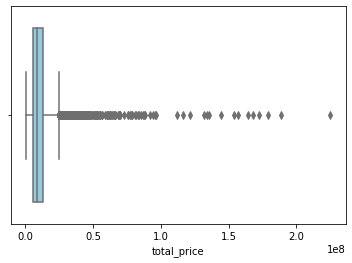

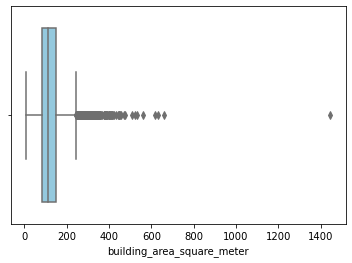

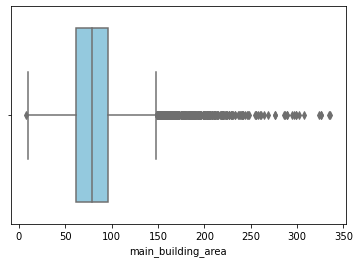

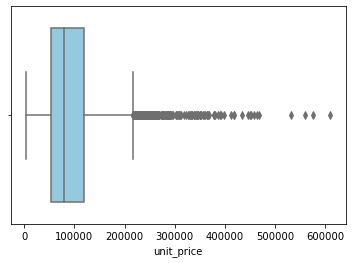

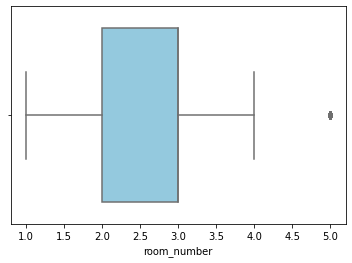

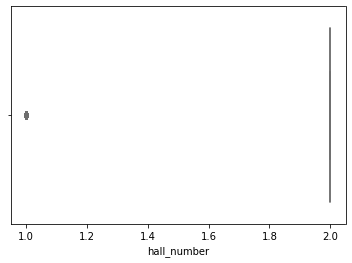

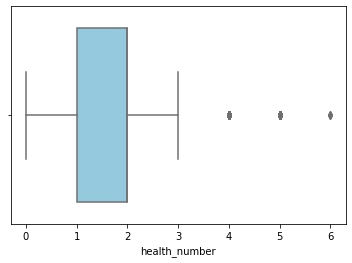

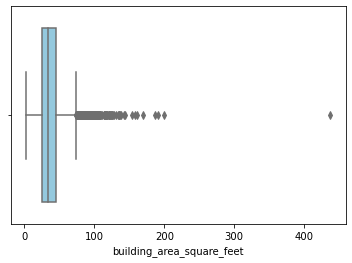

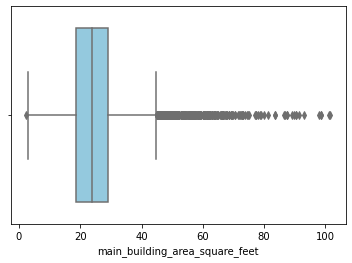

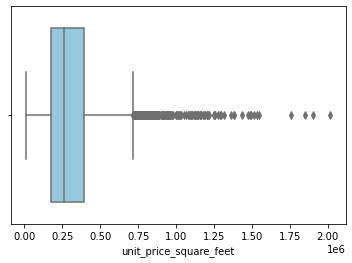

In [24]:
# 盒鬚圖
for f in [ i for i in num_features if i!='tx_dt_year']:
    sns.boxplot( x=df_analysis[f], whis=1.5, orient='h', color='skyblue' )
    plt.xlabel( f )
    plt.show()

In [25]:
over_2e8_index = df_analysis.index[ df_analysis['total_price']>2*(10**8) ]
print( '總價元(total_price)有', len(over_2e8_index), '筆資料超過 2 億元' )

df_analysis.loc[ over_2e8_index ]

總價元(total_price)有 1 筆資料超過 2 億元


,city,towns,main_use,use_zoning,total_price,building_area_square_meter,main_building_area,tx_dt,unit_price,room_number,hall_number,health_number,tx_dt_year,building_area_square_feet,main_building_area_square_feet,unit_price_square_feet
749,Taipei,士林區,住家用,住,225000000,618.19,288.89,1090427,363966.0,4,2,5,109,187.002475,87.389225,1.203193e+06


- 移除上列資料，因為此筆資料的總價異常高，且其單價元平方公尺(unit_price) 363,966 亦遠高於平均約 94,548。

In [26]:
# 移除總價元(total_price)超過 2 億元的資料
df_analysis.drop( over_2e8_index[0], inplace=True )

df_analysis.describe()

,total_price,building_area_square_meter,main_building_area,unit_price,room_number,hall_number,health_number,tx_dt_year,building_area_square_feet,main_building_area_square_feet,unit_price_square_feet
count,6.853000e+03,6853.000000,6853.000000,6853.000000,6853.000000,6853.000000,6853.000000,6853.0,6853.000000,6853.000000,6.853000e+03
mean,1.138552e+07,121.695965,82.535618,94509.139209,2.849701,1.793083,1.732672,109.0,36.813029,24.967024,3.124269e+05
std,1.132733e+07,62.566891,36.858926,58288.136556,0.898302,0.405125,0.679774,0.0,18.926485,11.149825,1.926881e+05
min,4.100000e+05,7.440000,7.440000,3239.000000,1.000000,1.000000,0.000000,109.0,2.250600,2.250600,1.070744e+04
25%,5.600000e+06,83.010000,61.060000,53595.000000,2.000000,2.000000,1.000000,109.0,25.110525,18.470650,1.771736e+05
50%,8.600000e+06,109.400000,79.090000,79737.000000,3.000000,2.000000,2.000000,109.0,33.093500,23.924725,2.635934e+05
75%,1.330000e+07,147.430000,95.940000,118871.000000,3.000000,2.000000,2.000000,109.0,44.597575,29.021850,3.929620e+05
max,1.888800e+08,1444.950000,335.760000,610104.000000,5.000000,2.000000,6.000000,109.0,437.097375,101.567400,2.016873e+06


In [27]:
over_1000_index = df_analysis.index[ df_analysis['building_area_square_meter']>1000 ]
print( '建物移轉總面積平方公尺(building_area_square_meter)有', len(over_1000_index), '筆資料超過 1000 平方公尺' )

over_300_index = df_analysis.index[ df_analysis['building_area_square_feet']>300 ]
print( '建物移轉總面積坪(building_area_square_feet)有', len(over_300_index), '筆資料超過 300 坪' )

df_analysis.loc[ over_1000_index ]

建物移轉總面積平方公尺(building_area_square_meter)有 1 筆資料超過 1000 平方公尺
建物移轉總面積坪(building_area_square_feet)有 1 筆資料超過 300 坪


,city,towns,main_use,use_zoning,total_price,building_area_square_meter,main_building_area,tx_dt,unit_price,room_number,hall_number,health_number,tx_dt_year,building_area_square_feet,main_building_area_square_feet,unit_price_square_feet
5553,Taichung,龍井區,住家用,住,4680000,1444.95,73.54,1090529,3239.0,3,2,2,109,437.097375,22.24585,10707.438017


- 移除上列資料，因為此筆資料的坪數過大，但其單價元平方公尺(unit_price) 3,239 卻遠低於平均約 94,509。

In [28]:
# 移除建物移轉總面積坪(building_area_square_feet)超過 300 坪的資料
df_analysis.drop( over_300_index[0], inplace=True )

df_analysis.describe()

,total_price,building_area_square_meter,main_building_area,unit_price,room_number,hall_number,health_number,tx_dt_year,building_area_square_feet,main_building_area_square_feet,unit_price_square_feet
count,6.852000e+03,6852.000000,6852.000000,6852.000000,6852.000000,6852.000000,6852.000000,6852.0,6852.000000,6852.000000,6.852000e+03
mean,1.138650e+07,121.502846,82.536931,94522.459428,2.849679,1.793053,1.732633,109.0,36.754611,24.967422,3.124709e+05
std,1.132787e+07,60.494352,36.861456,58281.958479,0.898365,0.405147,0.679815,0.0,18.299542,11.150590,1.926676e+05
min,4.100000e+05,7.440000,7.440000,6768.000000,1.000000,1.000000,0.000000,109.0,2.250600,2.250600,2.237355e+04
25%,5.600000e+06,83.010000,61.045000,53601.750000,2.000000,2.000000,1.000000,109.0,25.110525,18.466113,1.771959e+05
50%,8.600000e+06,109.395000,79.110000,79742.500000,3.000000,2.000000,2.000000,109.0,33.091988,23.930775,2.636116e+05
75%,1.330000e+07,147.430000,95.950000,118874.000000,3.000000,2.000000,2.000000,109.0,44.597575,29.024875,3.929719e+05
max,1.888800e+08,658.340000,335.760000,610104.000000,5.000000,2.000000,6.000000,109.0,199.147850,101.567400,2.016873e+06


# 4. 找出台北市時價登入總價高度相關的變數

阿宏我是台北人他想找出影響台北市總價、單價元坪的因子<br>
相關係數 0.3 以下為低相關，0.3\~0.7 為中等相關，0.7 以上為高度相關<br>
1. 資料切片切出 city 欄位為台北市的資料，並找出時價登入總價(total_price)高度相關的變數
2. 資料切片切出 city 欄位為台北市的資料，找出單價元坪(unit_price_square_feet)高度相關的變數

In [29]:
# 資料切片切出 city 欄位為台北市的資料

df_taipei = df_analysis[ df_analysis['city']=='Taipei' ]
df_taipei.head()

,city,towns,main_use,use_zoning,total_price,building_area_square_meter,main_building_area,tx_dt,unit_price,room_number,hall_number,health_number,tx_dt_year,building_area_square_feet,main_building_area_square_feet,unit_price_square_feet
0,Taipei,文山區,住家用,住,36000000,229.91,110.91,1090406,156583.0,3,2,2,109,69.547775,33.550275,517629.752066
1,Taipei,文山區,住家用,住,5580000,37.31,24.58,1090317,149558.0,2,1,1,109,11.286275,7.435450,494406.611570
2,Taipei,文山區,住家用,住,18280000,123.66,98.74,1090328,147825.0,3,2,2,109,37.407150,29.868850,488677.685950
3,Taipei,文山區,住家用,住,8000000,124.25,90.78,1090417,64386.0,3,1,2,109,37.585625,27.460950,212846.280992
4,Taipei,文山區,住家用,住,2200000,30.16,26.15,1090417,72944.0,5,2,2,109,9.123400,7.910375,241137.190083


In [30]:
# 時價登入中，各變數間的相關係數
correlation = df_taipei.corr()#[['total_price','unit_price_square_feet']]
correlation

,total_price,building_area_square_meter,main_building_area,unit_price,room_number,hall_number,health_number,tx_dt_year,building_area_square_feet,main_building_area_square_feet,unit_price_square_feet
total_price,1.000000,0.862308,0.705892,0.582932,0.329024,0.277600,0.588484,NaN,0.862308,0.705892,0.582932
building_area_square_meter,0.862308,1.000000,0.833087,0.207651,0.488802,0.384049,0.692117,NaN,1.000000,0.833087,0.207651
main_building_area,0.705892,0.833087,1.000000,0.102358,0.636596,0.469032,0.652984,NaN,0.833087,1.000000,0.102358
unit_price,0.582932,0.207651,0.102358,1.000000,-0.103544,0.003756,0.118247,NaN,0.207651,0.102358,1.000000
room_number,0.329024,0.488802,0.636596,-0.103544,1.000000,0.509411,0.545231,NaN,0.488802,0.636596,-0.103544
hall_number,0.277600,0.384049,0.469032,0.003756,0.509411,1.000000,0.407677,NaN,0.384049,0.469032,0.003756
health_number,0.588484,0.692117,0.652984,0.118247,0.545231,0.407677,1.000000,NaN,0.692117,0.652984,0.118247
tx_dt_year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
building_area_square_feet,0.862308,1.000000,0.833087,0.207651,0.488802,0.384049,0.692117,NaN,1.000000,0.833087,0.207651
main_building_area_square_feet,0.705892,0.833087,1.000000,0.102358,0.636596,0.469032,0.652984,NaN,0.833087,1.000000,0.102358


In [31]:
# 時價登入中，與總價(total_price)高度相關的變數
high_corr_1 = correlation[ ['total_price'] ].sort_values( by='total_price',  ascending=False )
high_corr_1[ high_corr_1['total_price']>0.7 ]

,total_price
total_price,1.000000
building_area_square_meter,0.862308
building_area_square_feet,0.862308
main_building_area,0.705892
main_building_area_square_feet,0.705892


In [32]:
# 時價登入中，與單價元坪(unit_price_square_feet)高度相關的變數
high_corr_2 = correlation[['unit_price_square_feet']].sort_values( by='unit_price_square_feet',  ascending=False )
high_corr_2[ high_corr_2['unit_price_square_feet']>0.7 ]

,unit_price_square_feet
unit_price,1.0
unit_price_square_feet,1.0


# 5. 資料視覺化並解釋


我想要以視覺化的方式來看房價資料，並且請各位資料科學家解釋圖表給阿宏我知道
1. 以城市(city)為 x 軸，以單價元坪(unit_price_square_feet)為 y 軸畫出 boxplot，並找出單價元坪(unit_price_square_feet)中位數最高的地區
2. 進一步對台北市的資料做圖，以建物現況格局-房(room_number)為 x 軸，以總價元(total_price)為 y 軸畫出 boxplot，並找出總價元(total_price)中位數最高的房間數。hint:資料切片找出city欄位為台北市的資料，再進一步畫圖
3. 對台北市的資料做圖，先將地區(twons)做編碼在進行，再以地區(twon)為 x 軸，以單價元坪(unit_price_square_feet)為 y 軸畫出boxplot，並找出單價元坪(unit_price_square_feet)中位數最高的地區。hint:運用LabelEncoder()對地區(twons)做編碼，運用.inverse_transform()反查編碼的地區

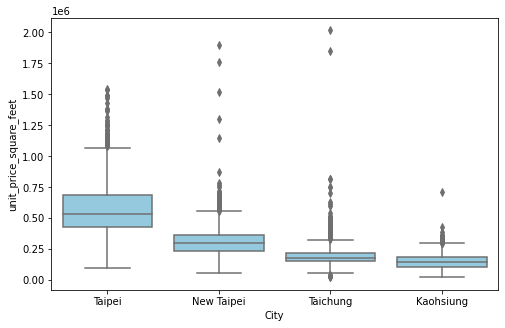

In [33]:
# 1.以城市(city)為 x 軸，以單價元坪(unit_price_square_feet)為 y 軸畫出boxplot，並找出單價元坪(unit_price_square_feet)中位數最高的地區。

fig = plt.figure( figsize=(8,5) )
sns.boxplot( x='city', y='unit_price_square_feet', data=df_analysis, whis=1.5, color='skyblue' )
plt.xlabel( 'City' )
plt.show()

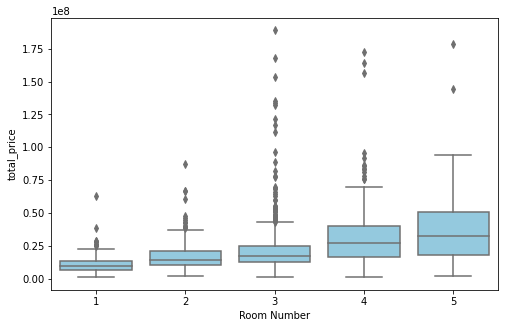

In [34]:
# 2.進一步對台北市的資料做圖，以建物現況格局-房(room_number)為 x 軸，以總價元(total_price)為 y 軸畫出 boxplot，並找出總價元(total_price)中位數最高的房間數。

fig = plt.figure( figsize=(8,5) )
sns.boxplot( x='room_number', y='total_price', data=df_taipei, whis=1.5, color='skyblue' )
plt.xlabel( 'Room Number' )
plt.show()

In [35]:
# 3.對台北市的資料做圖，先將地區(twons)做編碼在進行，再以地區(twon)為 x 軸，以單價元坪(unit_price_square_feet)為 y 軸畫出boxplot，並找出單價元坪(unit_price_square_feet)中位數最高的地區。

from sklearn.preprocessing import LabelEncoder

df_taipei_town = df_taipei[['towns','unit_price_square_feet']].copy()
df_taipei_town['Label_towns'] = LabelEncoder().fit_transform( df_taipei_town['towns'] )
df_taipei_town

,towns,unit_price_square_feet,Label_towns
0,文山區,517629.752066,9
1,文山區,494406.611570,9
2,文山區,488677.685950,9
3,文山區,212846.280992,9
4,文山區,241137.190083,9
...,...,...,...
1373,萬華區,561590.082645,11
1374,內湖區,494479.338843,3
1375,大安區,817047.933884,8
1376,信義區,465831.404959,2


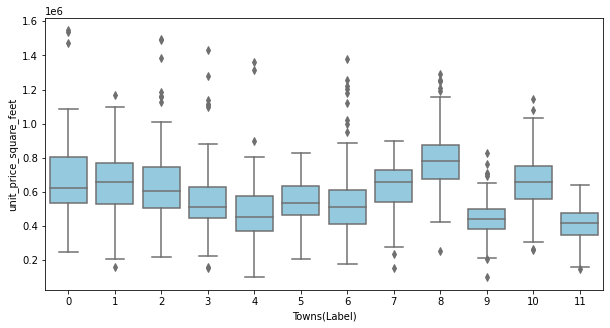

In [36]:
fig = plt.figure( figsize=(10,5) )
sns.boxplot( x='Label_towns', y='unit_price_square_feet', data=df_taipei_town, whis=1.5, color='skyblue' )
plt.xlabel( 'Towns(Label)' )
plt.show()

In [37]:
le = LabelEncoder().fit( df_taipei_town['towns'] )
print( '單價元坪(unit_price_square_feet)中位數最高的地區為', le.inverse_transform([8])[0] )

單價元坪(unit_price_square_feet)中位數最高的地區為 大安區


In [38]:
for i in np.arange(12):
    print( 'Label', i, ':', le.inverse_transform([i])[0] )

Label 0 : 中山區
Label 1 : 中正區
Label 2 : 信義區
Label 3 : 內湖區
Label 4 : 北投區
Label 5 : 南港區
Label 6 : 士林區
Label 7 : 大同區
Label 8 : 大安區
Label 9 : 文山區
Label 10 : 松山區
Label 11 : 萬華區
